# SUTD 2021 50.007 Homework 1

> James Raphael Tiovalen / 1004555

In [234]:
# Setup and install dependencies
!pip3 install numpy matplotlib

# Import libraries
import os
import secrets
import numpy as np
import matplotlib.pyplot as plt

## 2. Linear Classification

In [235]:
# Set OS-independent paths, relative to current directory
train_path = os.path.join("HW1_data", "1", "train_1_5.csv")
test_path = os.path.join("HW1_data", "1", "test_1_5.csv")

# Read the data
train_data = np.genfromtxt(train_path, delimiter=',')
test_data = np.genfromtxt(test_path, delimiter=',')

In [236]:
# Define parameter initialization method
def initialize_parameters():
    theta = np.array([0.0, 0.0])
    offset = 0.0
    return theta, offset

# Define training function for the perceptron algorithm
def train_perceptron(theta, offset, train_data, num_of_epochs):
    xs = train_data[:, :-1]
    ys = train_data[:, -1]

    # Loop through the entire training dataset num_of_epochs times
    for _ in range(num_of_epochs):
        for idx, (xi, yi) in enumerate(zip(xs, ys)):
            # Check if there is a prediction mistake made on this sample data (either misclassified or on the classifier's decision boundary)
            if yi * (theta.dot(xi) + offset) <= 0.0:
                # Update values of theta and offset accordingly
                theta += (yi * xi)
                offset += yi

    return theta, offset

# Define testing function for the perceptron algorithm
def test_perceptron(theta, offset, test_data):
    xs = test_data[:, :-1]
    ys = test_data[:, -1]
    test_data_count = len(test_data)
    results = ys * (xs.dot(theta) + offset) > 0.0
    num_of_correct_predictions = results.sum()
    return num_of_correct_predictions / test_data_count, num_of_correct_predictions, test_data_count

### (a) Perceptron Algorithm for 1 Epoch

In [237]:
epochs = 1
theta, offset = initialize_parameters()
theta, offset = train_perceptron(theta, offset, train_data, epochs)
accuracy, num_of_correct_predictions, test_data_count = test_perceptron(theta, offset, test_data)
print(f"Results after {epochs} epoch:\n"
      f"- Theta: {theta}, offset: {offset}\n"
      f"- Test accuracy: {accuracy * 100}% ({num_of_correct_predictions} correct out of {test_data_count})")

Results after 1 epoch:
- Theta: [-2.4483233  -5.88190688], offset: 0.0
- Test accuracy: 96.7065868263473% (969 correct out of 1002)


### (b) Perceptron Algorithm for 5 Epochs

In [238]:
epochs = 5
theta, offset = initialize_parameters()
theta, offset = train_perceptron(theta, offset, train_data, epochs)
accuracy, num_of_correct_predictions, test_data_count = test_perceptron(theta, offset, test_data)
print(f"Results after {epochs} epochs:\n"
      f"- Theta: {theta}, offset: {offset}\n"
      f"- Test accuracy: {accuracy * 100}% ({num_of_correct_predictions} correct out of {test_data_count})")

Results after 5 epochs:
- Theta: [-2.05895878 -8.83521606], offset: 1.0
- Test accuracy: 96.7065868263473% (969 correct out of 1002)


We achieved the exact same accuracy on the test dataset for both 1 epoch and 5 epochs. This makes sense since we trained on the exact same entire training dataset in the exact same order for each epoch (i.e., no randomization elements). The model would not be able to "learn" any additional new information and "fit better" just by visiting the same data points in the same order repeatedly again and again. This is because the model has learned from all of its mistakes and it has successfully classified all the data points correctly in the first epoch.

## 3. Linear and Polynomial Regression

In [239]:
# Set OS-independent paths, relative to current directory
x_path = os.path.join("HW1_data", "2", "hw1x.dat")
y_path = os.path.join("HW1_data", "2", "hw1y.dat")

# Read the data
x1 = np.genfromtxt(x_path)
y = np.genfromtxt(y_path)
n = len(x1)
# Add a column vector of 1s to the inputs to serve as the "input" to the intercept term (to handle bias/centering)
X = np.c_[np.ones(n), x1]
learning_rate = 0.01

# Define utility function to plot the regression graphs
def plot_regression(x1, predicted_y, actual_y, title="", x_label="", y_label=""):
    plt.scatter(x1, actual_y, c="b")
    plt.plot(x1, predicted_y, c="r")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Define utility function to calculate empirical risk/training loss
def calc_half_mse(predicted_y, actual_y, n):
    diff = actual_y - predicted_y
    return diff.dot(diff) / (2 * n)

### (a) Closed Form Linear Regression Formula

Closed Form Solution:
- Theta: [3.2447227  1.78157138]
- Training error: 0.5812605752543938


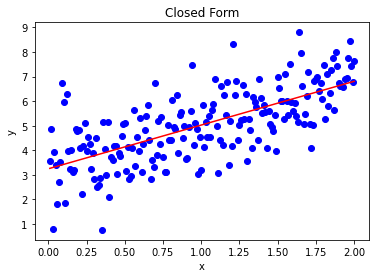

In [240]:
def closed_form(X, y):
    # In this case, we do not need to divide by n to solve for theta (possible floating number rounding errors if inputs are very small)
    # This will still output the correct theta
    A = X.T.dot(X)
    b = X.T.dot(y)
    theta = np.linalg.pinv(A).dot(b)
    return theta

theta = closed_form(X, y)
predicted_y = X.dot(theta)
training_loss = calc_half_mse(predicted_y, y, n)
print(f"Closed Form Solution:\n"
      f"- Theta: {theta}\n"
      f"- Training error: {training_loss}")
plot_regression(x1, predicted_y, y, "Closed Form", "x", "y")

### (b) Part 1: Batch Gradient Descent

Batch Gradient Descent (for 5 epochs)

After epoch 0:
Theta = [0.05035202 0.0565422 ], error = 13.219917694196358

After epoch 1:
Theta = [0.09963227 0.11181881], error = 12.677517326806719

After epoch 2:
Theta = [0.14786419 0.16585759], error = 12.158610566668758

After epoch 3:
Theta = [0.1950707  0.21868571], error = 11.662179145218182

After epoch 4:
Theta = [0.24127422 0.27032973], error = 11.18724893007848

Minimum error: 11.18724893007848, with associated theta: [0.24127422 0.27032973]


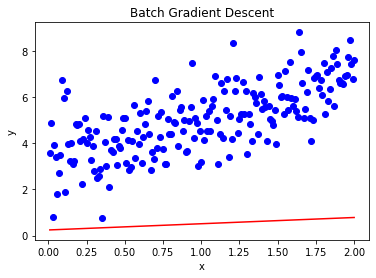

In [241]:
def batch_gd(theta, X, y, n, learning_rate, epochs):
    min_error = float("inf")
    error = 0
    theta_with_min_error = np.zeros(2)
    for epoch in range(epochs):
        theta += learning_rate / n * (y - X.dot(theta)).dot(X)
        error = calc_half_mse(X.dot(theta), y, n)
        print(f"After epoch {epoch}:\nTheta = {theta}, error = {error}\n")
        if error < min_error:
            min_error = error
            theta_with_min_error = theta
    print(f"Minimum error: {min_error}, with associated theta: {theta_with_min_error}")
    return theta, theta_with_min_error, min_error, error

theta = np.zeros(2)
epochs = 5
print(f"Batch Gradient Descent (for {epochs} epochs)\n")
theta, theta_with_min_error, min_error, error = batch_gd(theta, X, y, n, learning_rate, epochs)

predicted_y = X.dot(theta)
plot_regression(x1, predicted_y, y, "Batch Gradient Descent", "x", "y")

### (b) Part 2: Stochastic Gradient Descent

Stochastic Gradient Descent (for 5 epochs)

After epoch 1:
Theta = [2.52820703 2.45018304], error = 0.6567584770235831

After epoch 2:
Theta = [2.60426405 2.25397453], error = 0.6321809334849383

After epoch 3:
Theta = [2.86708771 2.17122064], error = 0.6066618421843262

After epoch 4:
Theta = [2.82608627 1.96682341], error = 0.6139985459536029

After epoch 5:
Theta = [2.91676369 1.9327421 ], error = 0.6005629546533677

Minimum error: 0.5895198376783387, with associated theta: [2.91676369 1.9327421 ]


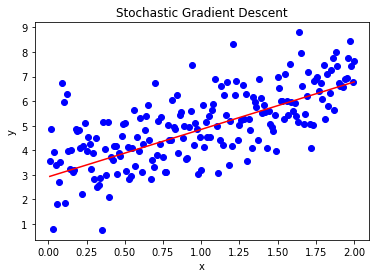

In [242]:
def stochastic_gd(theta, X, y, n, learning_rate, epochs):
    # When random sampling/drawing with replacement, 1 epoch = n samples
    total_samples = n * epochs
    min_error = float('inf')
    error = 0
    theta_with_min_error = np.zeros(2)
    # Track per epoch
    epoch_counter = 0
    for sample in range(total_samples):
        epoch_counter += 1
        i = secrets.SystemRandom().randrange(0, n)
        theta += learning_rate * (y[i] - X[i].dot(theta)) * X[i]
        error = calc_half_mse(X.dot(theta), y, n)
        if epoch_counter % n == 0:
            print(f"After epoch {epoch_counter // n}:\nTheta = {theta}, error = {error}\n")
        if error < min_error:
            min_error = error
            theta_with_min_error = theta
    print(f"Minimum error: {min_error}, with associated theta: {theta_with_min_error}")
    return theta, theta_with_min_error, min_error, error

theta = np.zeros(2)
epochs = 5
print(f"Stochastic Gradient Descent (for {epochs} epochs)\n")
theta, theta_with_min_error, min_error, error = stochastic_gd(theta, X, y, n, learning_rate, epochs=5)

predicted_y = X.dot(theta)
plot_regression(x1, predicted_y, y, "Stochastic Gradient Descent", "x", "y")

Comparing Batch GD and Stochastic GD, we can clearly see that Batch GD converges much slower as compared to Stochastic GD, assuming that they have the same learning rate. Batch GD takes much longer to get close to the Closed Form's error. However, Batch GD guarantees that the training loss will decrease with every update, allowing us to find the global minimum (assuming a convex loss function) instead of oscillating near the minimum. Stochastic GD, on the other hand, is more unstable and the loss might increase due to outlier points.

To capture the beneficial aspects of both types of GD (and balance their disadvantages), we can use Mini-Batch GD, updating the points every `n` samples (where `n` could be any positive integer applicable to that particular dataset or the available computing resources). Usually, we select some power of 2 (a popular option) as the value of `n`, which is our batch size.

### (c) Polynomial Regression

Closed Form Solution for Order 2:
- Theta: [3.58076915 0.78341361 0.49659591]
- Training error: 0.5703016121648223


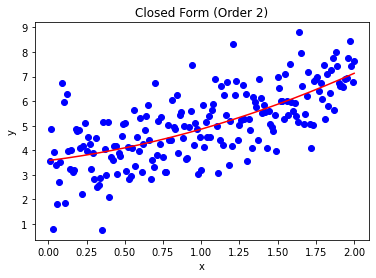

Closed Form Solution for Order 3:
- Theta: [3.52394943 1.11846512 0.08090267 0.13787504]
- Training error: 0.570084436469135


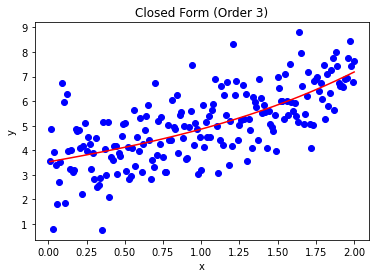

Closed Form Solution for Order 4:
- Theta: [ 3.85376334 -2.09126966  7.22513464 -5.38187521  1.3730722 ]
- Training error: 0.5646163879286428


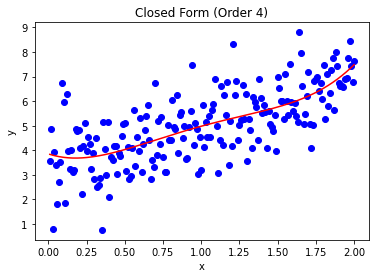

Closed Form Solution for Order 5:
- Theta: [ 3.7181433  -0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956]
- Training error: 0.56389681847492


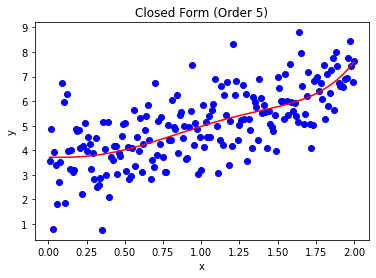

Closed Form Solution for Order 6:
- Theta: [  3.43194652   5.56010885 -27.43134442  58.7290222  -54.95621258
  23.44890148  -3.72427727]
- Training error: 0.561343303890295


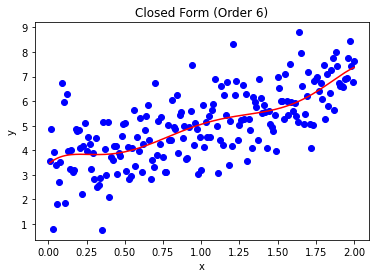

Closed Form Solution for Order 7:
- Theta: [   2.98164467   17.3114679  -104.72228219  270.37451914 -343.19085199
  229.4868252   -77.69333024   10.51443539]
- Training error: 0.5562352515819008


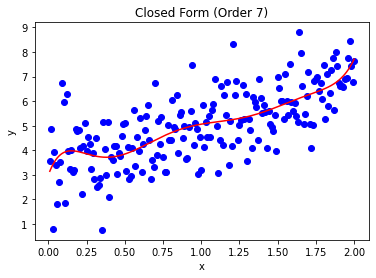

Closed Form Solution for Order 8:
- Theta: [   2.63575644   28.70154297 -201.17776847  617.80882645 -987.0574913
  893.36610031 -462.31605196  127.58336806  -14.56081177]
- Training error: 0.5537805799388834


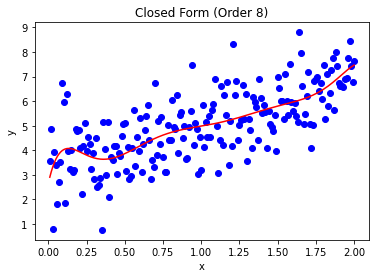

Closed Form Solution for Order 9:
- Theta: [    2.40962161    37.81867194  -297.49672699  1057.62618256
 -2044.10354614  2358.18148804 -1673.28359985   716.81728363
  -170.19470596    17.20659494]
- Training error: 0.5529231121291288


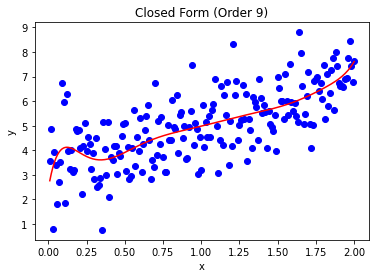

Closed Form Solution for Order 10:
- Theta: [   2.50098294   33.27179971 -237.49058342  712.83631802 -988.4675045
  455.25554562  445.16357136 -755.93093109  452.17242146 -128.98649931
   14.6355949 ]
- Training error: 0.552626183140234


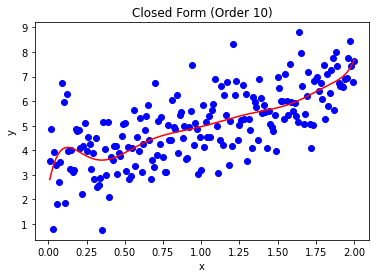

Closed Form Solution for Order 11:
- Theta: [    2.37058763    38.90992475  -301.10043335  1016.55099487
 -1714.77313232  1335.48861694    74.29779816 -1093.9239502
   997.46615601  -441.36221313   100.48464584    -9.42520428]
- Training error: 0.5524108480450504


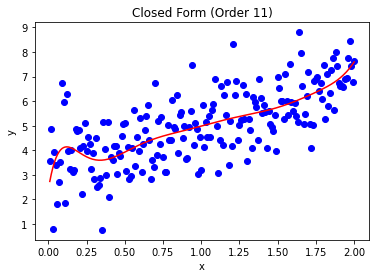

Closed Form Solution for Order 12:
- Theta: [    2.32161658    39.99901628  -299.86560822   934.87003326
 -1295.67863464   460.92295837   745.62902069  -627.41924286
  -437.26832962   876.42378235  -523.81729889   144.5539341
   -15.68101263]
- Training error: 0.5511203821544651


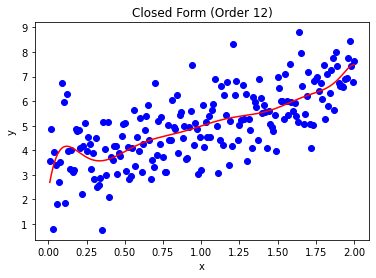

Closed Form Solution for Order 13:
- Theta: [   2.39366028   36.25575674 -251.40914917  683.8129921  -699.06407166
  -97.71334988  543.62743378   88.71938288 -482.23730469  -59.35761166
  517.53982925 -380.92110062  116.8869648   -13.56546879]
- Training error: 0.5498817592654638


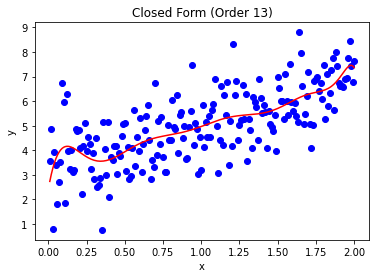

Closed Form Solution for Order 14:
- Theta: [   2.55423362   29.92723095 -188.41800308  436.51233101 -293.55351448
 -224.37030602  199.94802475  242.30713177  -93.23105764 -258.28268242
   47.95151091  272.02250671 -237.67870331   78.83549929   -9.58946818]
- Training error: 0.5497948775045909


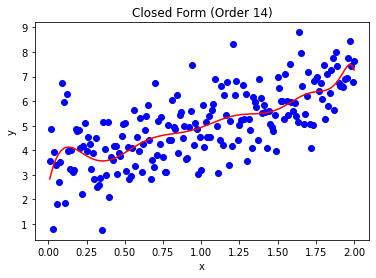

Closed Form Solution for Order 15:
- Theta: [   2.76970371   22.69969451 -128.47322416  249.15789223  -85.45813227
 -169.56116295   11.3250258   145.64546299   74.01245737  -92.95386028
 -119.75981236   55.149858    134.1615591  -135.49056435   47.6983664
   -6.00705582]
- Training error: 0.5513489697729861


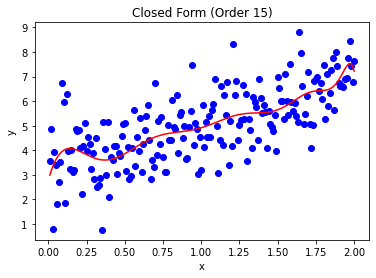

Lowest error of value 0.5497948775045909 occurs at order 14, after which the error increases and gets worse.


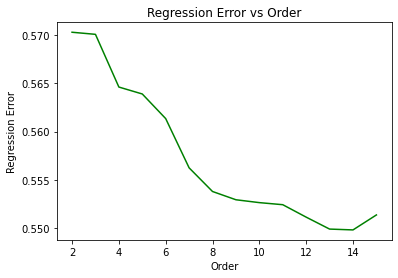

In [243]:
def PolyRegress(x1, y, d):
    # Track all error values
    errors = []
    XD = np.ones((n, d + 1))
    XD[:, 1] = x1
    for order in range(2, d + 1):
        XD[:, order] = x1 * XD[:, order - 1]
    for order in range(2, d + 1):
        X = XD[:, :order + 1]
        theta = closed_form(X, y)
        pred_y = X.dot(theta)
        error = calc_half_mse(pred_y, y, len(y))
        errors.append(error)
        print(f"Closed Form Solution for Order {order}:\n"
              f"- Theta: {theta}\n"
              f"- Training error: {error}")
        plot_regression(x1, pred_y, y, f"Closed Form (Order {order})", "x", "y")
    return errors

# Define utility function to plot all the error values
def plot_errors(d, errors):
    plt.plot(list(range(2, d + 1)), errors, c="g")
    plt.title("Regression Error vs Order")
    plt.xlabel("Order")
    plt.ylabel("Regression Error")
    plt.show()

d = 15
errors = PolyRegress(x1, y, d)
best_order = errors.index(min(errors)) + 2
print(f"Lowest error of value {min(errors)} occurs at order {best_order}, after which the error increases and gets worse.")
plot_errors(d, errors)

## 4. Ridge Regression

In [244]:
# Set OS-independent paths, relative to current directory
x_path = os.path.join("HW1_data", "3", "hw1_ridge_x.dat")
y_path = os.path.join("HW1_data", "3", "hw1_ridge_y.dat")

# Read the data. Note that the x_0 (column of 1s) is at the end.
X = np.genfromtxt(x_path, delimiter=',')
Y = np.genfromtxt(y_path)
val_size = 10
# Validation set
vX = X[:val_size, :]
vY = Y[:val_size]
# Training set
tX = X[val_size:, :]
tY = Y[val_size:]


### (a) Ridge Regression

In [245]:
def ridge_regression(tX, tY, l):
    tn = tX.shape[0]
    I = np.eye(tX.shape[1])
    theta = np.linalg.inv(tn * l * I + tX.T @ tX) @ tX.T @ tY
    return theta

# Regularization/regularizing parameter
l = 0.15
theta = ridge_regression(tX, tY, l)
print(f"Theta for λ = 0.15: {theta}")

Theta for λ = 0.15: [-0.57939825  1.15033028  0.04934122 -1.59867896]


### (b) Loss Graph Plotting

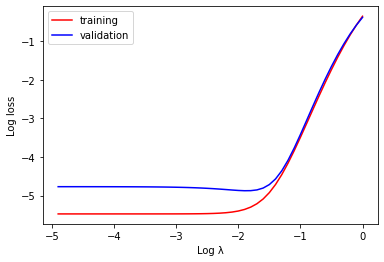

Best validation λ that minimizes the validation loss: 10^(-1.90) = 0.012589254117941668


In [246]:
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0, 5, 0.1)
for i in index:
    w = ridge_regression(tX, tY, 10**i)
    tloss.append(np.sum((np.dot(tX, w) - tY) ** 2) / tn / 2)
    vloss.append(np.sum((np.dot(vX, w) - vY) ** 2) / vn / 2)


plt.plot(index, np.log(tloss), 'r', label="training")
plt.plot(index, np.log(vloss), 'b', label="validation")
plt.xlabel("Log λ")
plt.ylabel("Log loss")
plt.legend()
plt.show()

best_log_l = index[vloss.index(min(vloss))]
print(f"Best validation λ that minimizes the validation loss: 10^({best_log_l:.2f}) = {10 ** best_log_l}")